In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from json_to_pandas import DataLoader

In [17]:
dl = DataLoader()

In [48]:
data_dict = dl.process_data()

100%|██████████| 2000/2000 [00:01<00:00, 1373.75it/s]


In [49]:
rk_ = data_dict["RKI_Data"]

In [50]:
rk_.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
0,-1,-nicht erhoben-,-nicht erhoben-,A15-A34,W,1,0,146936,1584662400000,0-1
1,-1,-nicht erhoben-,-nicht erhoben-,A35-A59,M,1,0,146937,1584576000000,0-1
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,146938,1584144000000,01001
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,146939,1584576000000,01001
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,146940,1584144000000,01001


In [51]:
rk_.Bundesland.unique()

array(['-nicht erhoben-', 'Schleswig-Holstein', 'Hamburg',
       'Niedersachsen', 'Bremen', 'Nordrhein-Westfalen'], dtype=object)

In [52]:
rk_["Meldedatum"] = pd.to_datetime(rk_["Meldedatum"], unit="ms")

In [53]:
df = rk_.groupby(["IdLandkreis", "Meldedatum"]).aggregate(func="sum")[["AnzahlFall"]].reset_index()

In [59]:
df = df.pivot(values=["AnzahlFall"], index = "Meldedatum", columns="IdLandkreis")

In [60]:
df.fillna(0, inplace=True)

In [62]:
for x in range(df.shape[1]):
    df.iloc[:,x] = df.iloc[:,x].cumsum()

In [63]:
df.head()

AnzahlFall                                                        \
IdLandkreis        0-1 01001 01002 01003 01004 01051 01053 01054 01055 01056   
Meldedatum                                                                     
2020-02-04         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2020-02-26         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2020-02-27         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2020-02-28         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2020-02-29         0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

             ...                                                              
IdLandkreis  ... 05374 05378 05382 05512 05513 05515 05554 05558 05562 05566  
Meldedatum   ...                                                              
2020-02-04   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2020-02-26   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2020-02-27   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2020-02-28   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2020-02-29   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 97 columns]

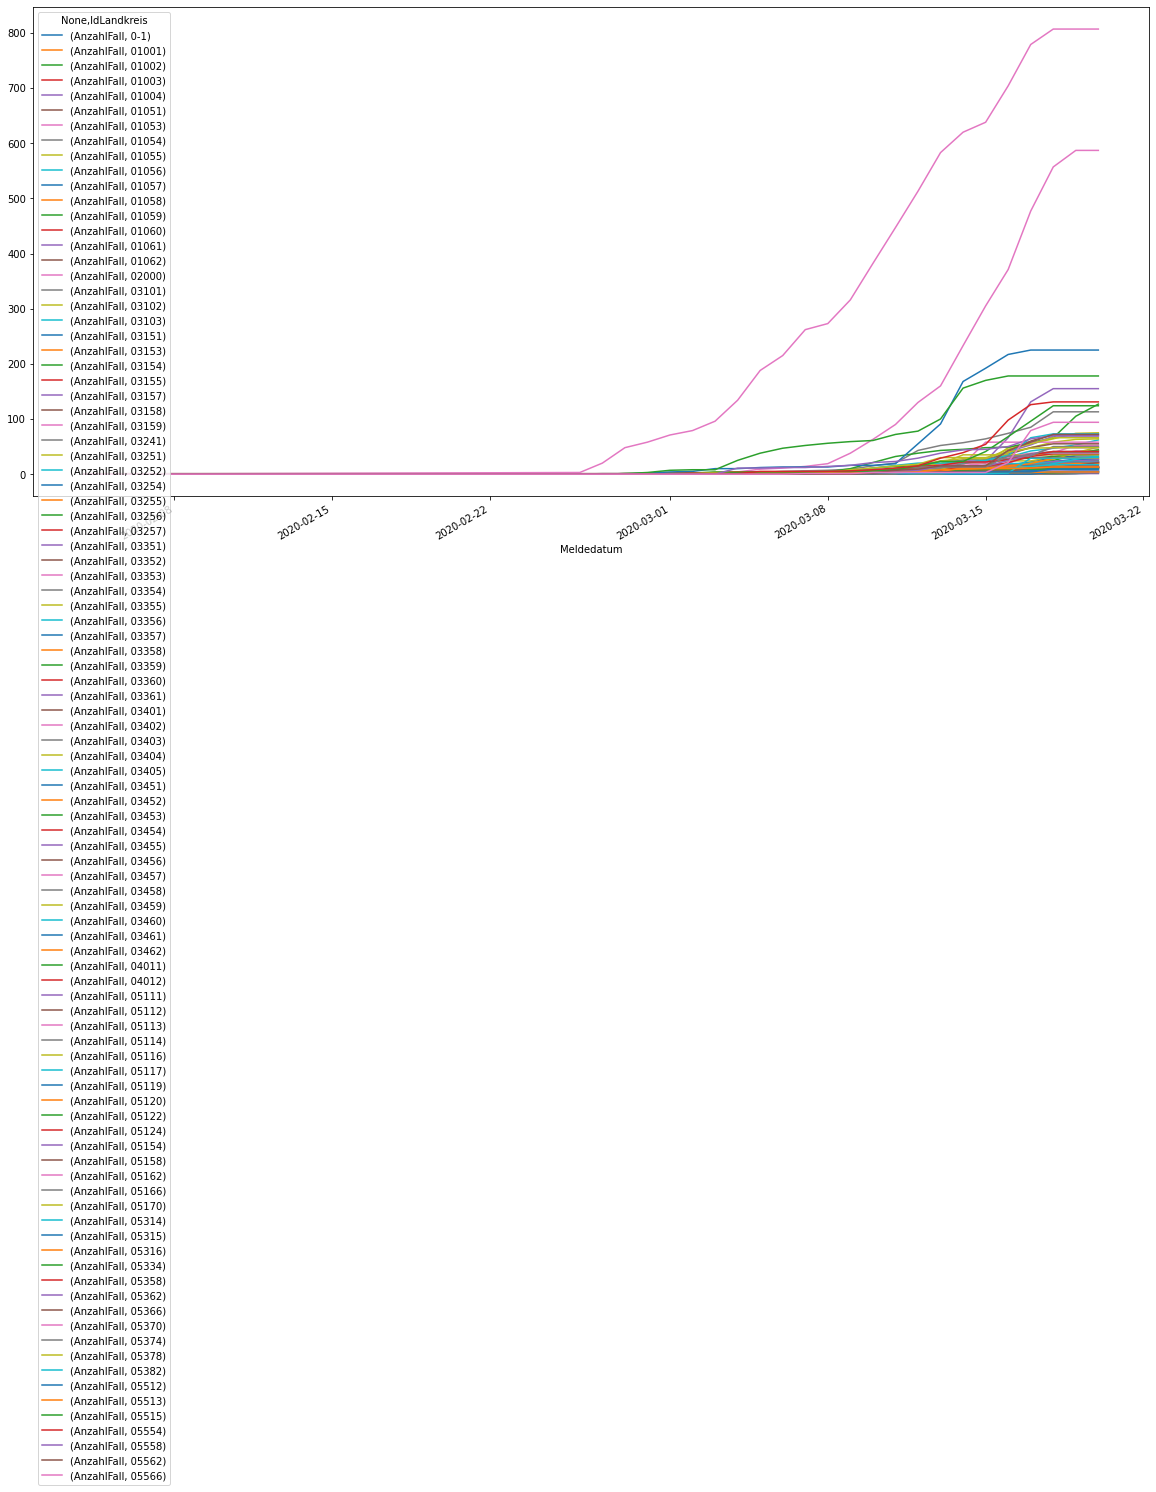

In [65]:
df.plot(figsize=(20,10))
plt.show()